# Univariate analysis using seaborn

# Cars Dataset EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [2]:
cars = pd.read_csv('Car details v3.csv')

In [3]:
cars.shape

(8128, 13)

In [4]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Disclaimer: The first section contains some data cleaning on the original dataset. 

### [Click here to skip to the univariate analysis](#section_id).


### Some Data Cleaning and Feature Engineering (creating new columns)

After performing the [11 essential code blocks](https://towardsdatascience.com/11-simple-code-blocks-for-complete-exploratory-data-analysis-eda-67c2817f56cd)  in a separate notebook, I identified 4 features that needed cleaning. We will perform the following cleaning procedures before we can go ahead with further analysis.

1. Name: We need to split it into two: The first part is the make (company name) and the last part is the model.
2. Mileage: This should be a float value. We split into two, keep the first number part, and add 'kmpl' to the column name to show the measuring unit.
3. Engine size: This should also be a float value. We split into two, keep the first number part, and add 'cc' to the column name to show the measuring unit.
4. Max power:  This should also be a float value. We split into two, keep the first number part, and add 'bhp' to the column name to show the measuring unit.

**Renaming** three column names

In [5]:
cars = cars.rename(columns={'mileage':'mileage_kmpl', 'engine':'engine_cc', 'max_power':'max_power_bhp'})

Spliting the **Name** column into ***Make*** and ***Model***

In [6]:
cars['make'] = cars['name'].str.split(' ').str[0]

In [7]:
cars['model'] = cars['name'].str.split(' ',1).str[-1]

Split the **Mileage** column and set type to float

In [8]:
cars['mileage_kmpl'] = cars['mileage_kmpl'].str.split(' ').str[0].astype('float')

Split the **Engine** column and set type to float

In [9]:
cars['engine_cc'] = cars['engine_cc'].str.split(' ').str[0].astype('float')

In [10]:
# try:
#     cars['max_power_bhp'].str.split(' ').str[0].astype('float')
#     #print("The total tax amount is ", tax_amount)
# except:
#     print ("max power value is invalid")

Split the **Max_power** column and set type to float. 

There was one value that was just a white space (the very first value with 1 value_count below) that was recognised as a string (non-number character) and was preventing the column from converting to float. I used a regex to convert any string character into NaN then did the type conversion.

In [11]:
cars['max_power_bhp'].str.split(' ').str[0].value_counts().sort_index()

           1
0          6
100       90
100.5      3
100.57     5
          ..
98.96     49
98.97      2
99        38
99.23      4
99.6       9
Name: max_power_bhp, Length: 322, dtype: int64

In [12]:
#Replace string value with nan. It was only 1 value
cars['max_power_bhp'] = cars['max_power_bhp'].str.split(' ').str[0].replace(r'^\s*$', np.nan, regex=True).astype('float')

Dataset after feature cleaning

In [13]:
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,torque,seats,make,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition


**Dropping** two unneeded columns: ***Torque*** and ***Name*** columns (we have name information in the make and model columns)columns.

In [14]:
cars = cars.drop(['name','torque'], axis=1)

**Rearranging** the column names

In [15]:
cars.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage_kmpl', 'engine_cc', 'max_power_bhp',
       'seats', 'make', 'model'],
      dtype='object')

In [16]:
cars = cars.reindex(['make', 'model', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage_kmpl', 'engine_cc', 'max_power_bhp','seats'],axis=1)

### Back to EDA 

In [17]:
cars.shape

(8128, 13)

In [18]:
cars.head()

,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats
0,Maruti,Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [19]:
cars.dtypes

make              object
model             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage_kmpl     float64
engine_cc        float64
max_power_bhp    float64
seats            float64
dtype: object

In [20]:
cars.describe()

,year,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


## Univariate analysis <a id='section_id'></a>

## Numeric columns

### 1. Histograms

Histogram of mileage feature with a binwidth of 5

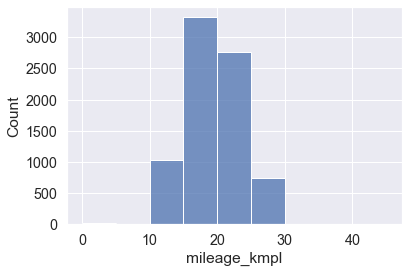

In [21]:
sns.histplot(x='mileage_kmpl', data=cars, binwidth=5);

Histplot of selling price

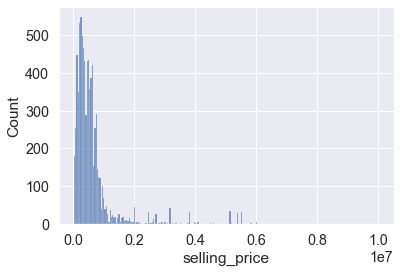

In [22]:
sns.histplot(x='selling_price', data=cars);

Histplots of all numeric columns

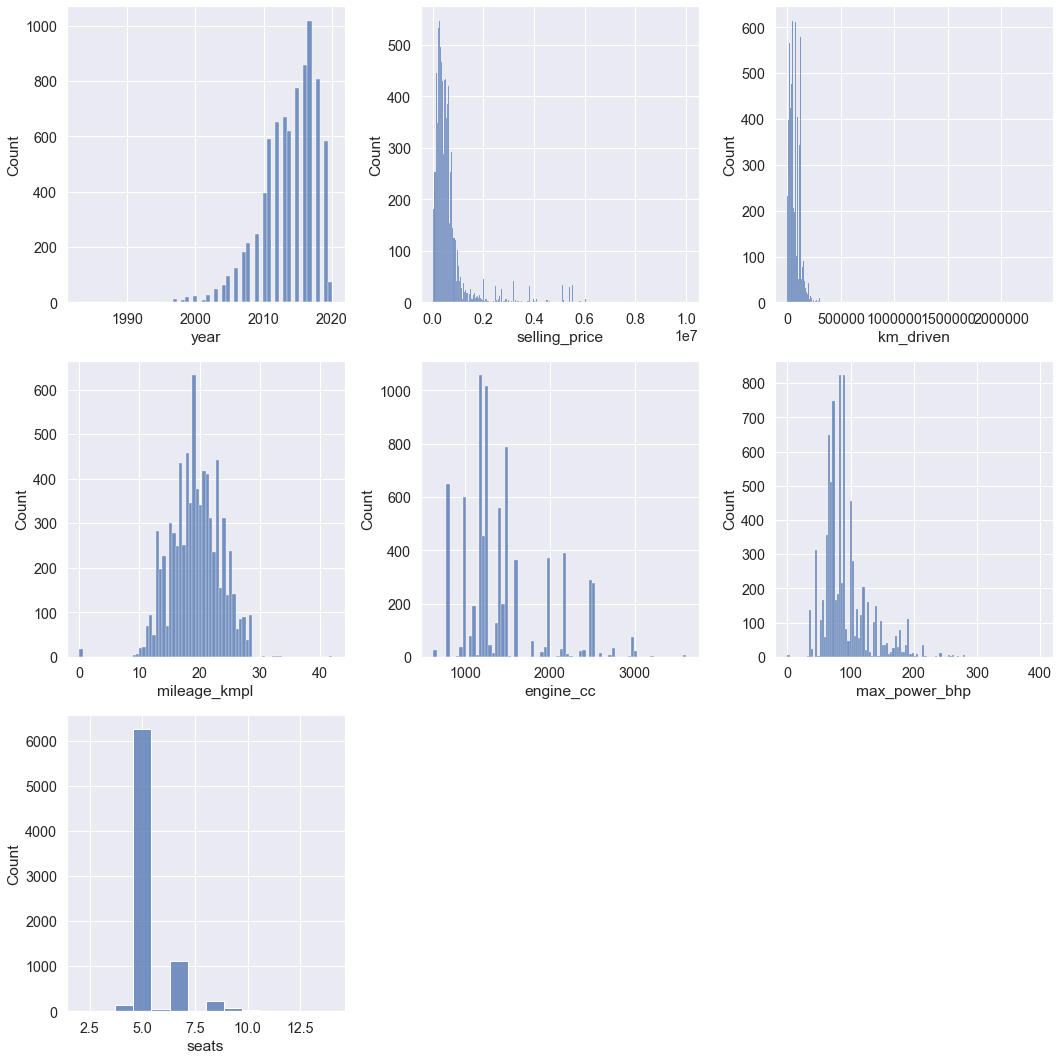

In [23]:
cols = 3
rows = 3

#create df of numeric features only.
num_cols = cars.select_dtypes(exclude='object')

#Size of figure
fig=plt.figure(figsize=(cols*5, rows*5))

#enumerate adds a counter as you
#iterate over each column
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = cars[col], ax = ax)
    
fig.tight_layout()  
plt.show()

### 2. Kde plots

Kde plot for selling price

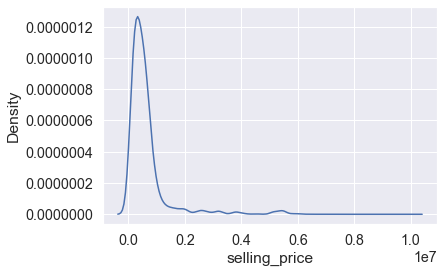

In [24]:
sns.kdeplot(x=cars['selling_price'])

KDE plot that segments engine size by fuel type

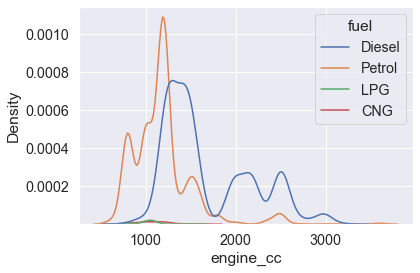

In [25]:
sns.kdeplot(x='engine_cc', data=cars, hue='fuel')

KDE plots for all numeric features

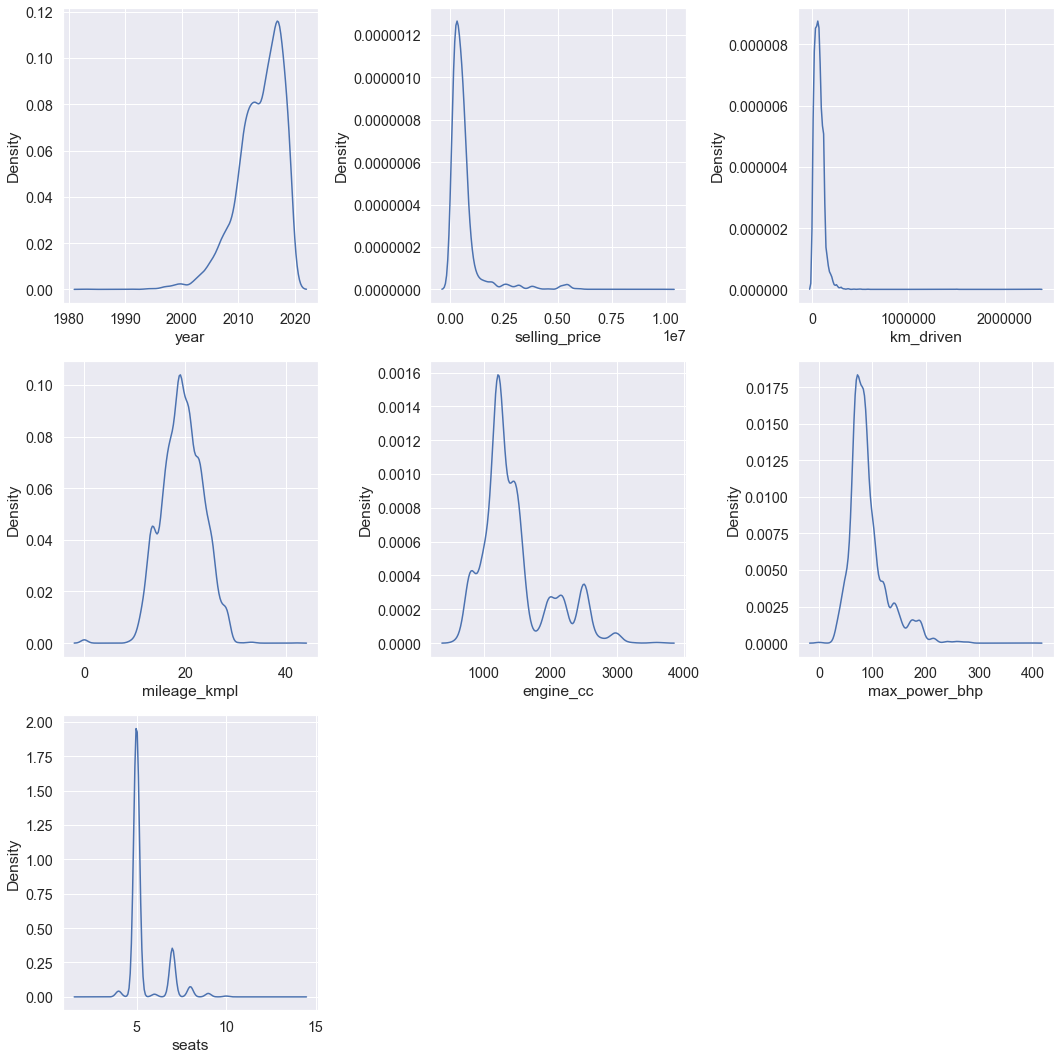

In [26]:
cols = 3
rows = 3

#create df of numeric features only.
num_cols = cars.select_dtypes(exclude='object')

#Size of figure
fig=plt.figure(figsize=(cols*5, rows*5))

#enumerate adds a counter as you
#iterate over each column
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.kdeplot(x = cars[col], ax = ax)
    
fig.tight_layout()  
plt.show()

### 3. KDE with histogram

KDE and histogram for selling price

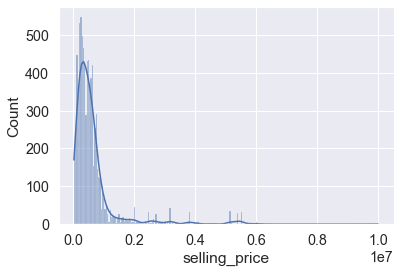

In [27]:
sns.histplot(x='selling_price', data=cars, kde=True)

KDE and histograms for all numeric features

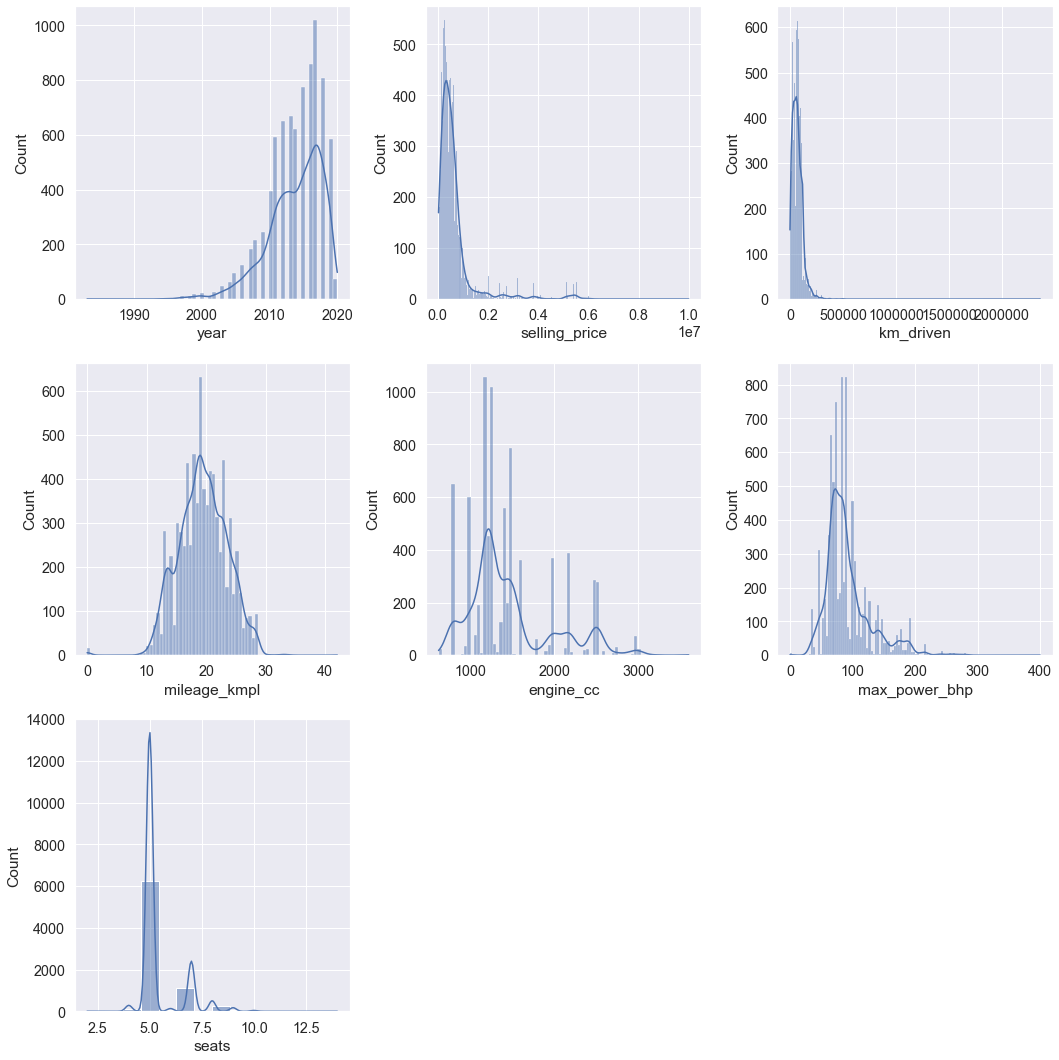

In [28]:
cols = 3
rows = 3
num_cols = cars.select_dtypes(exclude='object').columns

fig=plt.figure(figsize=(cols*5, rows*5))

for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = cars[col], kde= True, ax = ax)
    
fig.tight_layout()  
plt.show()

### 4. Rugplot

Rugplot for selling price. Set the height for the ticks using height=.

I also removed ytick labels coz the height is of no consequence.

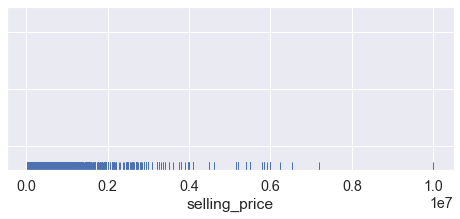

In [29]:
plt.figure(figsize=(8, 3))
ax = sns.rugplot(x='selling_price', data=cars, height=.05)
ax.set_yticklabels('')
plt.show()

Rugplot, histogram and kdeplot for the km_driven feature

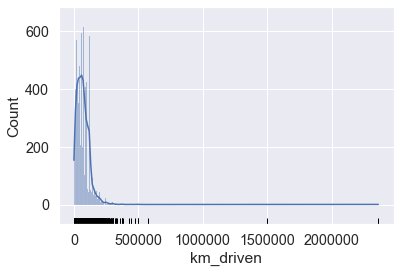

In [30]:
sns.rugplot(x='km_driven', data=cars, height=.03, color='black')
sns.histplot(x='km_driven', data=cars, kde=True)

Rugplots and histograms for all numeric features

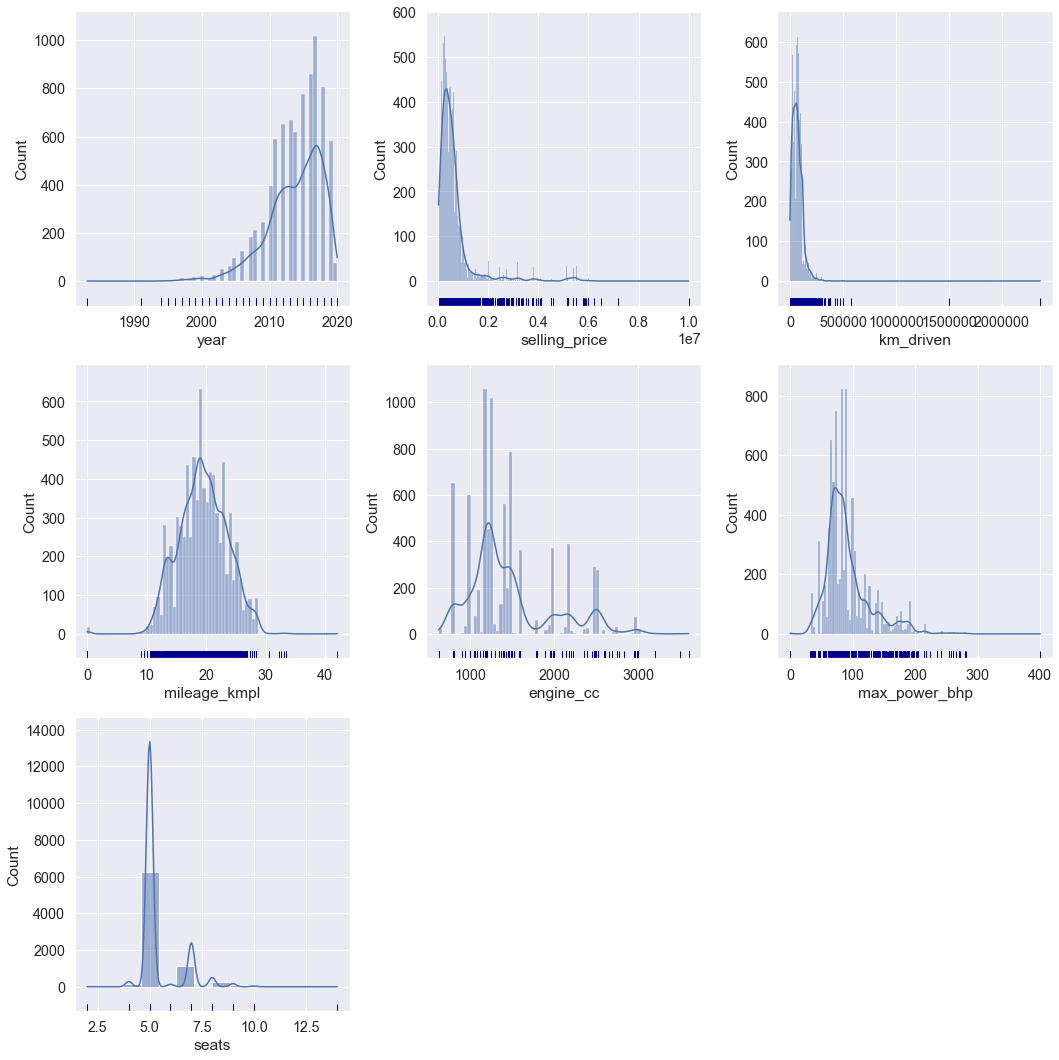

In [31]:
cols = 3
rows = 3
num_cols = cars.select_dtypes(exclude='object').columns

fig=plt.figure(figsize=(cols*5, rows*5))

for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.rugplot(x = cars[col], ax = ax, color='darkblue')
    sns.histplot(x = cars[col], ax = ax, kde=True)
    
fig.tight_layout()  
plt.show()

### 5. Boxplots

Box plot for mileage

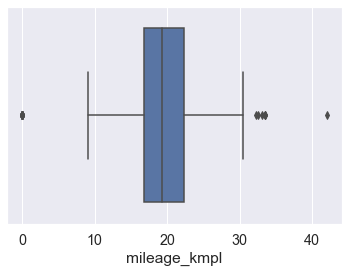

In [32]:
sns.boxplot(x=cars['mileage_kmpl'])

Segmented boxplot showing distribution of two features side by side. We are assuming they are comparable, for example they have the same unit of measurement.

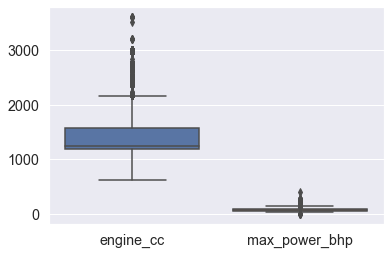

In [33]:
sns.boxplot(data=cars.loc[:, ['engine_cc', 'max_power_bhp']])

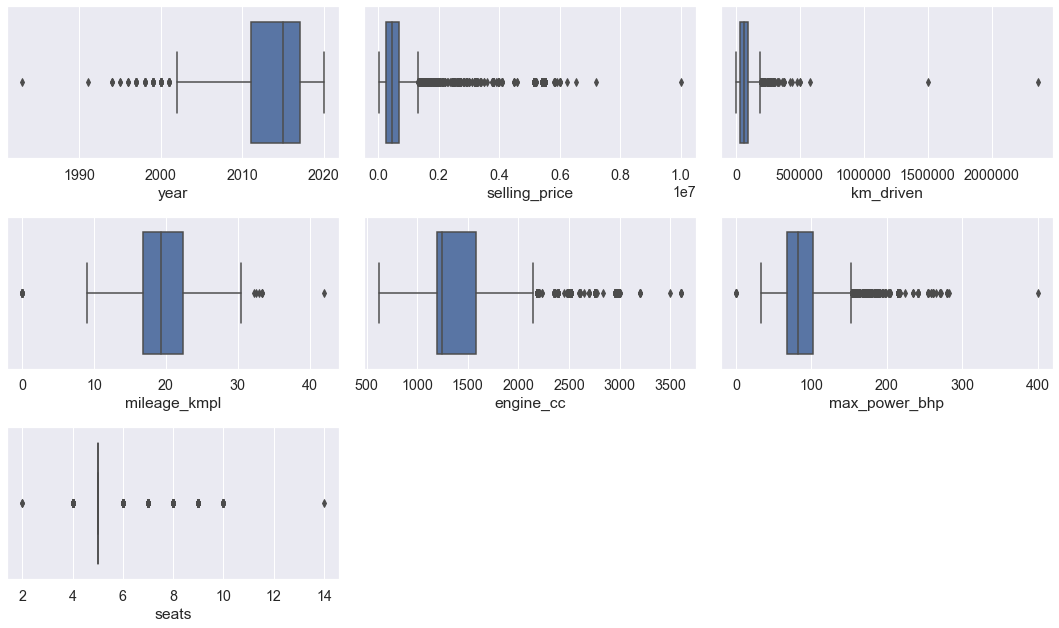

In [34]:
cols = 3
rows = 3
num_cols = cars.select_dtypes(exclude='object')

fig = plt.figure(figsize= (15,9))

for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=cars[col], ax=ax)
    
fig.tight_layout()  
plt.show()

### 6. Violin plot

Violin plot for the year column

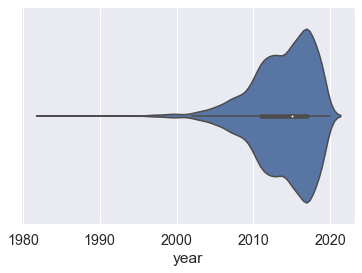

In [35]:
sns.violinplot(x=cars["year"])

Violin plots for all numeric features

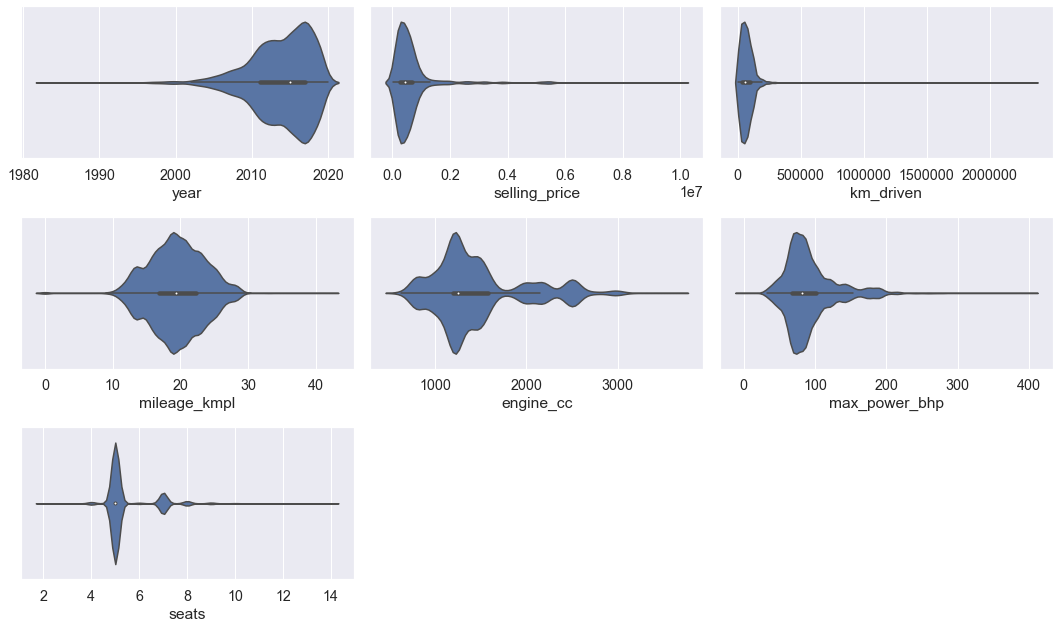

In [36]:
cols = 3
rows = 3
num_cols = cars.select_dtypes(exclude='object')

fig = plt.figure(figsize= (15,9))

for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.violinplot(x=cars[col], ax=ax)
    
fig.tight_layout()  
plt.show()

### 7. Strip plot

Strip plot for selling price

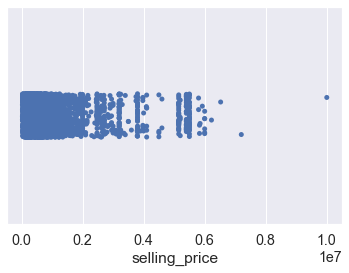

In [37]:
sns.stripplot(x=cars["selling_price"]);

Strip plots for all numeric features

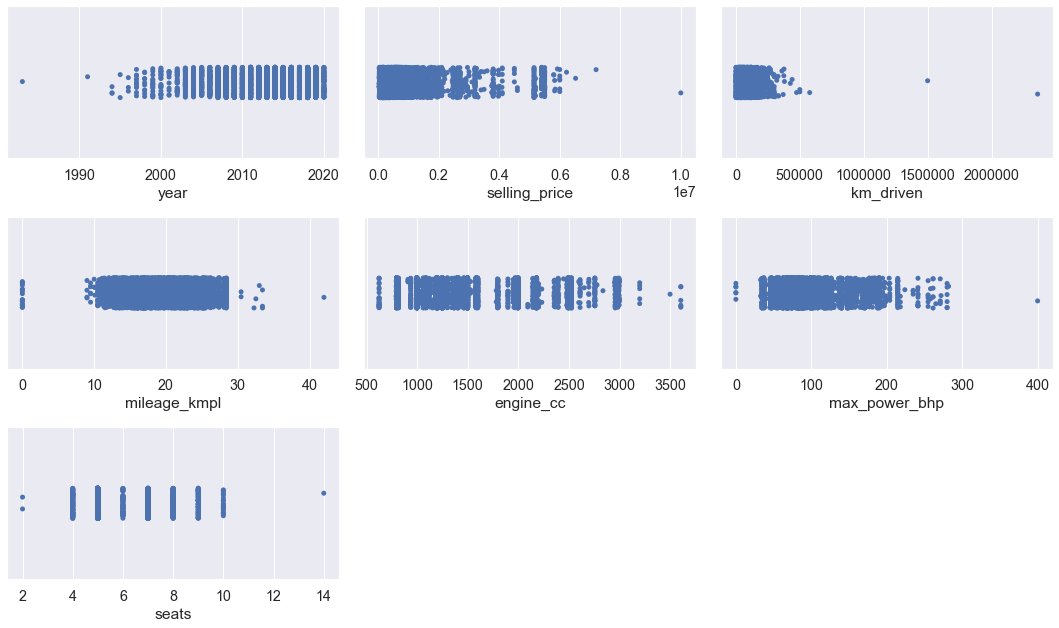

In [38]:
cols = 3
rows = 3
num_cols = cars.select_dtypes(exclude='object').columns

fig = plt.figure(figsize= (15,9))

for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.stripplot(x=cars[col], ax=ax)
    
fig.tight_layout()  
plt.show()

## Categorical Columns

Create a df consisting only the categorical features

In [39]:
all_cats = cars.select_dtypes(include='object')
all_cats

,make,model,fuel,seller_type,transmission,owner
0,Maruti,Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,Skoda,Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,Honda,City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner
3,Hyundai,i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
4,Maruti,Swift VXI BSIII,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...
8123,Hyundai,i20 Magna,Petrol,Individual,Manual,First Owner
8124,Hyundai,Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner
8125,Maruti,Swift Dzire ZDi,Diesel,Individual,Manual,First Owner
8126,Tata,Indigo CR4,Diesel,Individual,Manual,First Owner


Returns column names where unique classes are less than 10

In [40]:
all_cats = cars.select_dtypes(include='object')
cat_cols = all_cats.columns[all_cats.nunique() < 10]
cat_cols

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [41]:
cars.describe(include='object')

,make,model,fuel,seller_type,transmission,owner
count,8128,8128,8128,8128,8128,8128
unique,32,2058,4,3,2,5
top,Maruti,Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,2448,129,4402,6766,7078,5289


### 8. Count plots

Count plot of seller_type

Text(0.5, 0, 'Seller Type')

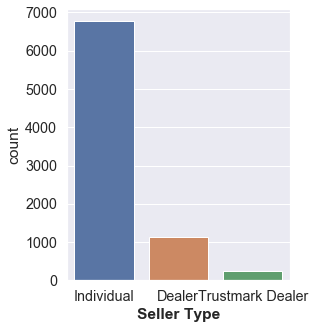

In [42]:
plt.figure(figsize=(4,5))
sns.countplot(x = cars['seller_type']);
plt.xlabel('Seller Type',fontweight='bold')

Count plots of all categorical features

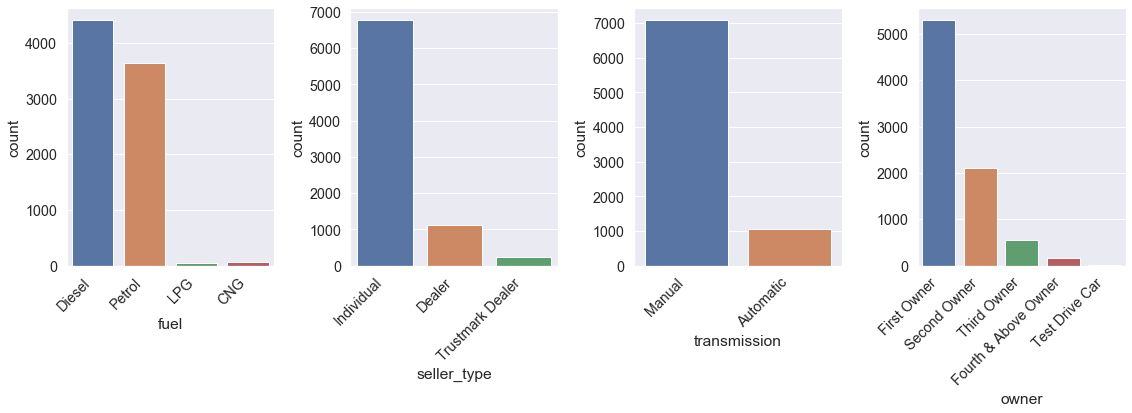

In [43]:
cols = 4
rows = 1
fig = plt.figure(figsize= (16,6))

for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=cars[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

Counts of 'transmission' types segmented by 'seller_type'

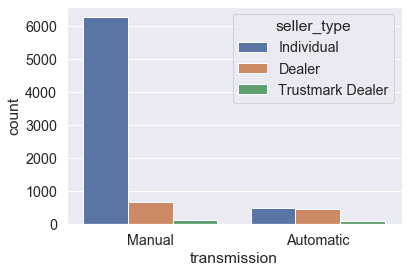

In [44]:
sns.countplot(x='transmission', data=cars, hue='seller_type')

### 9. Pie charts (though technically not a seaborn plot)

Pie chart of a made-up set of data

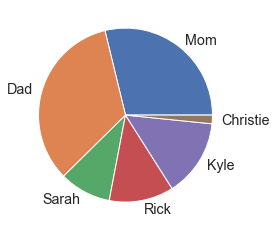

In [45]:
data = [36,42,12,15,18,2]
labels = ['Mom','Dad','Sarah','Rick','Kyle','Christie']
plt.pie(data, labels = labels)
plt.show()

In [46]:
df = cars['transmission'].value_counts()
df

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

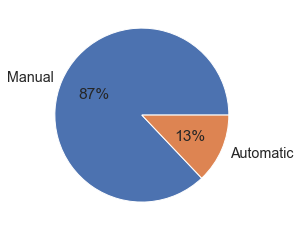

In [47]:
df = cars['transmission'].value_counts()
plt.pie(df, labels=df.index, autopct="%.0f%%");

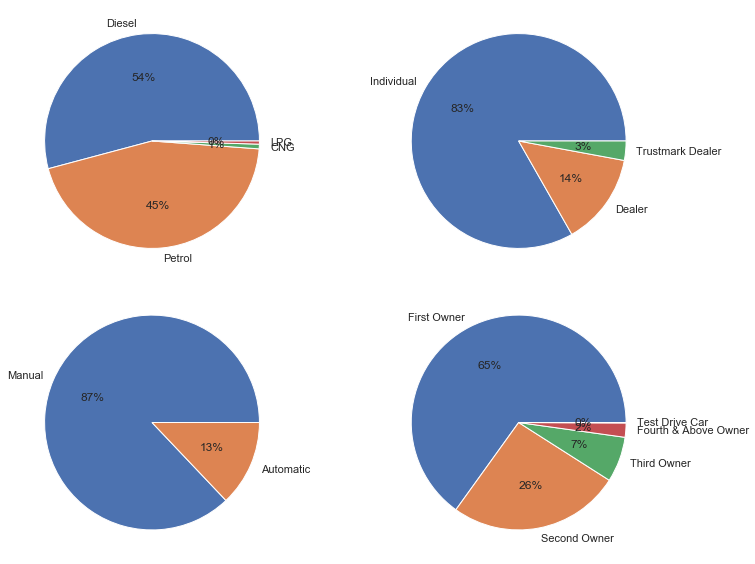

In [48]:
sns.set(font_scale=1)
cols = 2
rows = 2
fig = plt.figure(figsize= (12,8))

for i, col in enumerate(cat_cols):
    
    df = cars[col].value_counts()
    
    ax = fig.add_subplot(rows, cols, i+1)
    
    plt.pie(df, labels=df.index, autopct="%.0f%%")
    
fig.tight_layout()  
plt.show()

#Reset the scale back
sns.set(font_scale=1.3)